### Test Code for dm_control & mujoco


In [8]:
from dm_control import mujoco
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import PIL.Image
import numpy as np

# Access to enums and MuJoCo library functions.
from dm_control.mujoco.wrapper.mjbindings import enums
from dm_control.mujoco.wrapper.mjbindings import mjlib

In [3]:
def display_video(frames, framerate=30):
    height, width, _ = frames[0].shape
    dpi = 70
    orig_backend = matplotlib.get_backend()
    matplotlib.use("Agg")  # Switch to headless 'Agg' to inhibit figure rendering.
    fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
    matplotlib.use(orig_backend)  # Switch back to the original backend.
    ax.set_axis_off()
    ax.set_aspect("equal")
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])

    def update(frame):
        im.set_data(frame)
        return [im]

    interval = 1000 / framerate
    anim = animation.FuncAnimation(
        fig=fig,
        func=update,
        frames=frames,
        interval=interval,
        blit=True,
        repeat=False,
    )
    return HTML(anim.to_html5_video())

(240, 320, 3)


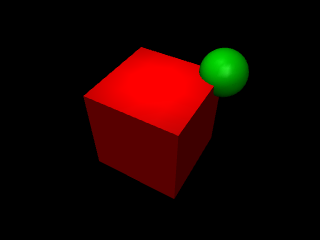

In [10]:
physics = mujoco.Physics.from_xml_path("./simple_model.xml")
pixels = physics.render()
print(pixels.shape)
PIL.Image.fromarray(pixels)

In [11]:
duration = 10  # (seconds)
framerate = 30  # (Hz)

# Visualize the joint axis
scene_option = mujoco.wrapper.core.MjvOption()
scene_option.flags[enums.mjtVisFlag.mjVIS_JOINT] = True

# Simulate and display video.
frames = []
physics.reset()  # Reset state and time
while physics.data.time < duration:
    physics.step()
    if len(frames) < physics.data.time * framerate:
        pixels = physics.render(scene_option=scene_option)
        frames.append(pixels)
display_video(frames, framerate)